#### Data from 
https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books

#### About Dataset

This dataset contains data for 130,000 kindle e-books. Publicly available data were scraped on October 2023.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.float_format','{:.2f}'.format)

In [3]:
df = pd.read_csv('book.csv')

df.head(3)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.80,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.40,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.80,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships


In [4]:
df.shape

(133102, 16)

# Data Cleaning

In [5]:
# Delete all NA values and unnecessary columns

In [6]:
df.isna().sum()

asin                     0
title                    0
author                 425
soldBy                9233
imgUrl                   0
productURL               0
stars                    0
reviews                  0
price                    0
isKindleUnlimited        0
category_id              0
isBestSeller             0
isEditorsPick            0
isGoodReadsChoice        0
publishedDate        49016
category_name            0
dtype: int64

In [7]:
df = df.dropna().copy()

In [8]:
df2 = df.drop(['asin','imgUrl', 'productURL'], axis = 1)

In [9]:
# Check for duplicated values

In [10]:
df2[df2.duplicated() == True]

,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name


In [11]:
# Chagne data type

In [12]:
df2.dtypes

title                 object
author                object
soldBy                object
stars                float64
reviews                int64
price                float64
isKindleUnlimited       bool
category_id            int64
isBestSeller            bool
isEditorsPick           bool
isGoodReadsChoice       bool
publishedDate         object
category_name         object
dtype: object

The publishedDate has been set as an object dtypes.  
I will change it into datetime dtypes.

In [13]:
df2['publishedDate'] = pd.to_datetime(df2['publishedDate'])

In [14]:
df2.dtypes

title                        object
author                       object
soldBy                       object
stars                       float64
reviews                       int64
price                       float64
isKindleUnlimited              bool
category_id                   int64
isBestSeller                   bool
isEditorsPick                  bool
isGoodReadsChoice              bool
publishedDate        datetime64[ns]
category_name                object
dtype: object

In [15]:
# After cleaning data, reset all index

In [16]:
df2 = df2.reset_index(drop = True)

In [17]:
df2.head()

,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.80,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.40,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.80,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.20,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.70,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


# Data Analysis

#### The oldest and newest years of publication in this dataset.

In [18]:
oldest = df2['publishedDate'].dt.year.min()
newest = df2['publishedDate'].dt.year.max()

print('The Oldest publication year is {}'.format(oldest))
print('The Newest publication year is {}'.format(newest))

print('That mean this dataset contains books published from {} to {}.'.format(oldest,newest))

The Oldest publication year is 1900
The Newest publication year is 2023
That mean this dataset contains books published from 1900 to 2023.


#### Total number of all authors

In [19]:
len(np.unique(df2['author']))

56254

#### Total number of all sellers

In [20]:
len(np.unique(df2['soldBy']))

37

#### Total number of categories and the number of books in each category

In [21]:
len(np.unique(df2['category_id']))

30

#### Number of books in each categories and how many of them are part of Kindle Unlimited, bestsellers, editors' picks, and Goodreads Choice selections?

In [22]:
category = pd.DataFrame(df2.groupby(['category_name','category_id'])
                        .agg({'title':'count', 'isBestSeller': lambda x: sum(x == True), 'isKindleUnlimited': lambda x: sum(x == True), 'isEditorsPick': lambda x: sum(x == True), 'isGoodReadsChoice': lambda x: sum(x == True)  })\
                        .sort_values('title', ascending = False).reset_index())

category

,category_name,category_id,title,isBestSeller,isKindleUnlimited,isEditorsPick,isGoodReadsChoice
0,Science & Math,15,5047,142,261,297,68
1,Engineering & Transportation,11,4860,48,571,69,9
2,Biographies & Memoirs,9,4796,111,491,815,133
3,Parenting & Relationships,6,4441,40,891,125,24
4,"Cookbooks, Food & Wine",18,4438,52,1251,577,31
5,Computers & Technology,10,4412,46,572,27,2
6,"Crafts, Hobbies & Home",26,4278,68,994,22,8
7,Travel,24,4028,69,873,105,14
8,Law,20,3991,16,304,29,1
9,Education & Teaching,3,3877,35,410,9,2


There are **30** different book categories with category_id ranging from 1 to 31, except for category_id 25, which is missing.  
**Science & Math** is the category that has published the most books and  
**Foreign Language** is the category that has published the fewest books.

In [35]:
# Number of books in each category

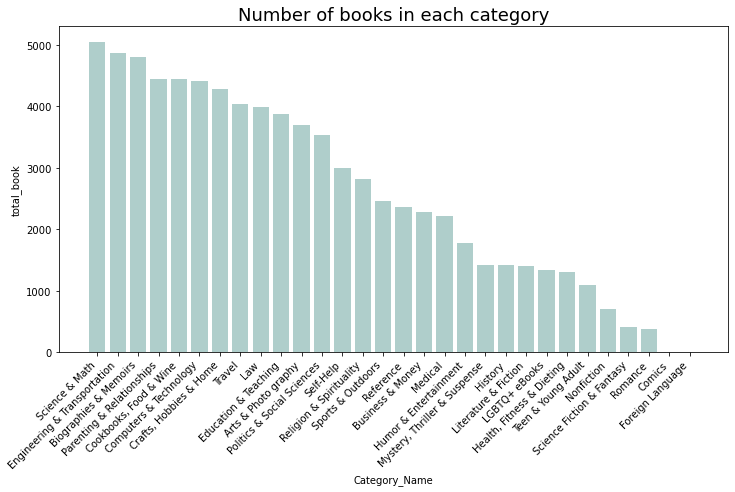

In [37]:
plt.figure(figsize=(12,6))

labels = []
for x in category['category_name']:
    labels.append(x)
    
values = []
for v in category['title']:
    values.append(v)
    
plt.bar(labels, values, color = '#afcecb')
plt.title('Number of books in each category', fontdict = {'fontsize':'18'})
plt.xlabel('Category_Name')
plt.ylabel('total_book')

plt.xticks(rotation = 45, ha = 'right');

In [48]:
# Number of Best Seller books from each category

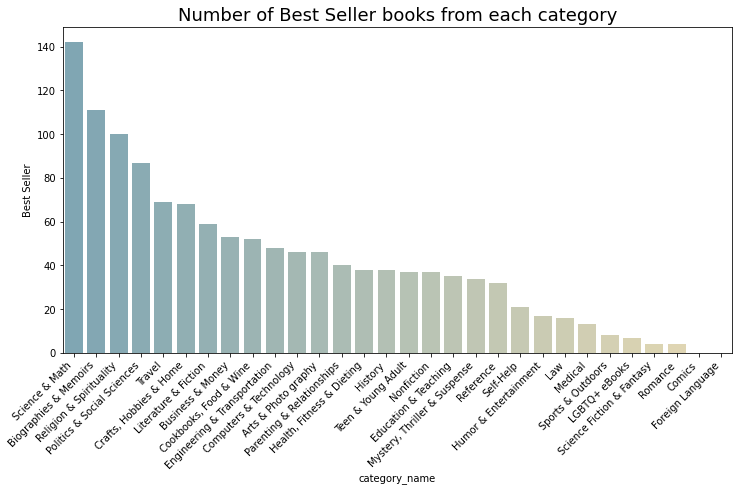

In [44]:
plt.figure(figsize=(12,6))

sorted_values = category.sort_values('isBestSeller', ascending = False)['category_name'].tolist()

sns.barplot(x ='category_name', y ='isBestSeller', data = category, order = sorted_values, palette = 'blend:#7AB,#EDA')

plt.title('Number of Best Seller books from each category', fontdict = {'fontsize':'18'})
plt.ylabel('Best Seller')
plt.xticks(rotation = 45, ha = 'right');

In [47]:
# Number of Kindle Unlimited books from each category

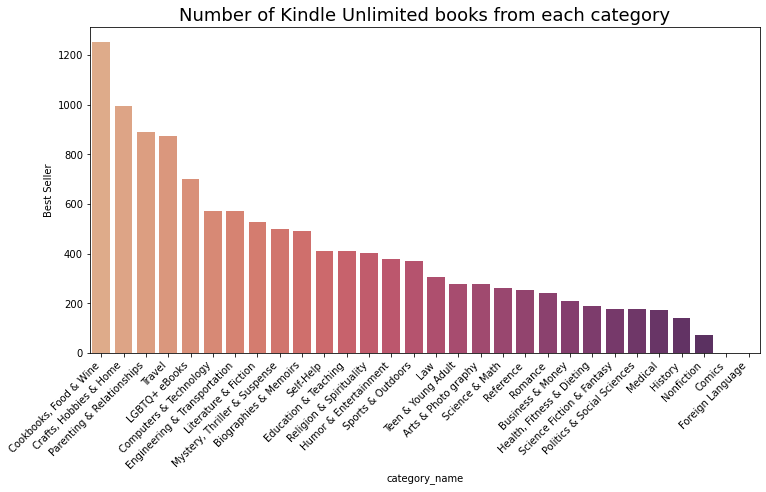

In [43]:
plt.figure(figsize=(12,6))

sorted_values = category.sort_values('isKindleUnlimited', ascending = False)['category_name'].tolist()

sns.barplot(x ='category_name', y ='isKindleUnlimited', data = category, order = sorted_values, palette = 'flare')

plt.title('Number of Kindle Unlimited books from each category', fontdict = {'fontsize':'18'})
plt.ylabel('Best Seller')
plt.xticks(rotation = 45, ha = 'right');

In [46]:
# Number of Editors' pick books from each category

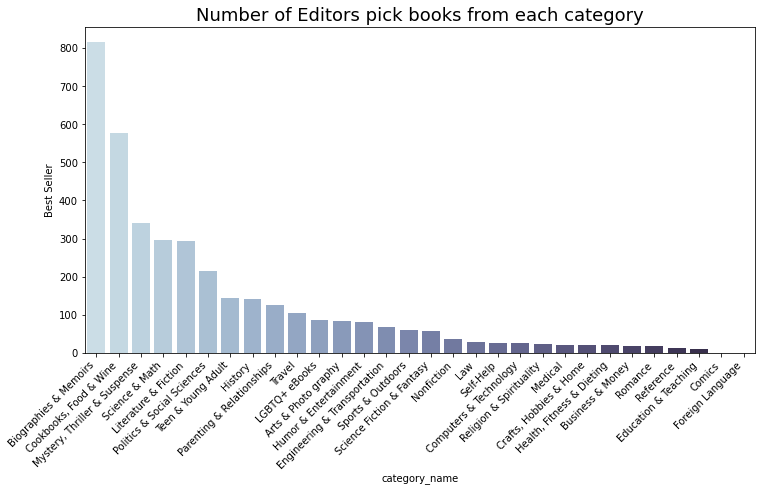

In [45]:
plt.figure(figsize=(12,6))

sorted_values = category.sort_values('isEditorsPick', ascending = False)['category_name'].tolist()

sns.barplot(x ='category_name', y ='isEditorsPick', data = category, order = sorted_values, palette = 'ch:s=.25,rot=-.25')

plt.title('Number of Editors pick books from each category', fontdict = {'fontsize':'18'})
plt.ylabel('Best Seller')
plt.xticks(rotation = 45, ha = 'right');

In [49]:
# Number of Good reads choice books from each category

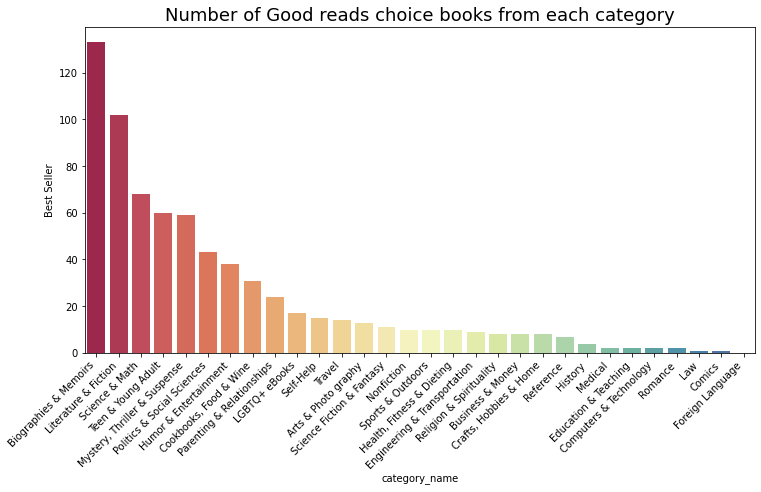

In [50]:
plt.figure(figsize=(12,6))

sorted_values = category.sort_values('isGoodReadsChoice', ascending = False)['category_name'].tolist()

sns.barplot(x ='category_name', y ='isGoodReadsChoice', data = category, order = sorted_values, palette = 'Spectral')

plt.title('Number of Good reads choice books from each category', fontdict = {'fontsize':'18'})
plt.ylabel('Best Seller')
plt.xticks(rotation = 45, ha = 'right');

#### How many categories of books does each seller sell?

In [28]:
df2.groupby('soldBy')\
    .agg({'category_id':'nunique'})\
    .sort_values('category_id', ascending = False)\
    .rename(columns={'category_id':'Total_category'}).reset_index()

,soldBy,Total_category
0,Amazon.com Services LLC,30
1,Macmillan,28
2,Simon and Schuster Digital Sales Inc,28
3,Penguin Group (USA) LLC,28
4,Random House LLC,28
5,HarperCollins Publishers,28
6,Hachette Book Group,28
7,Penguin Random House Publisher Services,28
8,HarperCollins Publishing,27
9,De Marque,27


#### True or False ratio

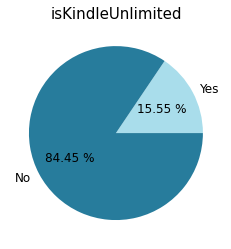

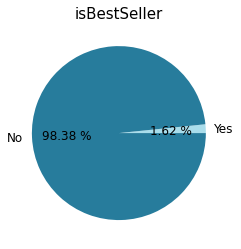

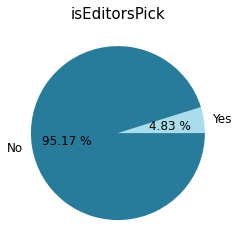

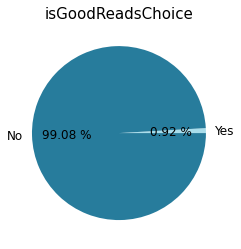

In [29]:
col = df2[['isKindleUnlimited', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice']]
labels = ['Yes', 'No']
colors = ['#a9ddeb', '#277c9c']

for i in col:
    Yes = len(df2[df2[i] == True])
    No = len(df2[df2[i] == False])
            
    plt.figure()       
    plt.pie([Yes,No], labels = labels, colors = colors, autopct = '%.2f %%', textprops={'fontsize': 12})
    plt.title(i, fontdict = {'fontsize':15})

#### Correlation 

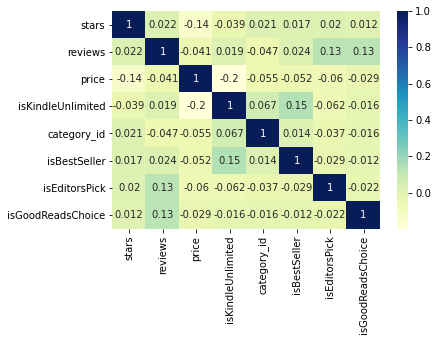

In [30]:
sns.heatmap(df2.corr(),annot = True, cmap = 'YlGnBu');

#### Top 10 books from Science Fiction & Fantasy, Literature & Fiction, Teen & Young Adult category

In [31]:
df3 = pd.DataFrame(df2.loc[df2['category_name'].isin(['Science Fiction & Fantasy', 'Literature & Fiction', 'Teen & Young Adult'])]).reset_index()

In [32]:
df3.drop('index', axis = 1)

,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,The Covenant of Water (Oprah's Book Club),Abraham Verghese,Amazon.com Services LLC,4.70,31767,9.24,False,5,False,True,False,2023-05-02,Literature & Fiction
1,Tom Lake: A Reese's Book Club Pick,Ann Patchett,HarperCollins Publishers,4.40,10325,15.99,False,5,False,True,False,2023-08-01,Literature & Fiction
2,Lessons in Chemistry: A Novel,Bonnie Garmus,Random House LLC,4.60,219990,14.99,False,5,False,True,False,2022-04-05,Literature & Fiction
3,Demon Copperhead: A Pulitzer Prize Winner,Barbara Kingsolver,HarperCollins Publishers,4.60,69379,16.99,False,5,False,True,False,2022-10-18,Literature & Fiction
4,Hello Beautiful (Oprah's Book Club): A Novel,Ann Napolitano,Random House LLC,4.40,44048,13.99,False,5,False,True,False,2023-03-14,Literature & Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,Ghost Tamer,Meredith R. Lyons,Amazon.com Services LLC,4.50,23,5.99,False,23,False,True,False,2023-09-19,Science Fiction & Fantasy
2906,Convict,Michael Cole,Amazon.com Services LLC,4.50,58,4.99,True,23,False,False,False,2023-08-23,Science Fiction & Fantasy
2907,One Perfect Summer: A novel,Brenda Novak,Harlequin Digital Sales Corp.,4.50,2980,14.49,False,23,False,False,False,2020-04-07,Science Fiction & Fantasy
2908,Let the Right One In: A Novel,John Ajvide Lindqvist,Macmillan,4.20,1280,12.99,False,23,False,False,False,2008-10-28,Science Fiction & Fantasy


In [33]:
# Are those books part of Kindle Unlimited, bestsellers, editors' picks, and Goodreads Choice selections?

In [34]:
df3[['title', 'author', 'stars', 'reviews', 'category_name','isKindleUnlimited', 'isBestSeller', 'isEditorsPick','isGoodReadsChoice']]\
.sort_values('reviews', ascending = False).head(10).reset_index().drop('index', axis = 1)

,title,author,stars,reviews,category_name,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice
0,Where the Crawdads Sing,Delia Owens,4.70,618227,Literature & Fiction,False,False,True,False
1,The Nightingale: A Novel,Kristin Hannah,4.70,289251,Literature & Fiction,False,False,True,False
2,Reminders of Him: A Novel,Colleen Hoover,4.70,242575,Literature & Fiction,True,False,True,False
3,The Midnight Library: A Novel,Matt Haig,4.30,234933,Literature & Fiction,False,False,True,False
4,Eleanor Oliphant Is Completely Fine: A Novel,Gail Honeyman,4.50,227722,Literature & Fiction,False,False,False,True
5,Beneath a Scarlet Sky: A Novel,Mark Sullivan,4.60,223114,Literature & Fiction,True,False,False,True
6,Lessons in Chemistry: A Novel,Bonnie Garmus,4.60,219990,Literature & Fiction,False,False,True,False
7,All the Light We Cannot See: A Novel,Anthony Doerr,4.50,216532,Literature & Fiction,False,False,True,False
8,Educated: A Memoir,Tara Westover,4.60,209864,Teen & Young Adult,False,False,True,False
9,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,4.60,202512,Literature & Fiction,False,False,True,False


Eight books from the Top 10 list are editors' picks, but none of the Top 10 books are considered bestsellers, even though they have the highest number of reviews.